Compare the footprint of the legacy dr5 sweep files to the foot print of GAMA DR3 regions

In [1]:
import numpy as np 
#feasibgs
from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
import matplotlib.patches as patches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
# read in gama regions
gama = Cat.GAMA()
names = ['g09', 'g12', 'g15']
fields = [gama.Read(ff, data_release=3, silent=True) for ff in names]

(-3.5, 3.5)

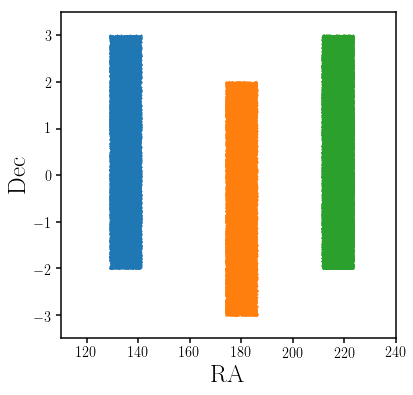

In [4]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for name, field in zip(names, fields): 
    sub.scatter(field['photo']['ra'], field['photo']['dec'], s=1, label=name.upper())
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([110., 240.])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([-3.5, 3.5])

In [5]:
# read in sweep file list 
sweep_files = np.loadtxt(UT.dat_dir()+'legacy/sweep/legacysurvey_dr5_sweep_5.0.sha256sum', 
                         unpack=True, usecols=[1], dtype='S')

In [6]:
sweep_files[0].split('-')[-1].strip('.fits')

'010p000'

In [7]:
# now lets convert the files into RA and Dec
ra_mins, ra_maxs = np.zeros(len(sweep_files)), np.zeros(len(sweep_files))
dec_mins, dec_maxs = np.zeros(len(sweep_files)), np.zeros(len(sweep_files))
for i_f, sfile in enumerate(sweep_files): 
    radec_min = sfile.split('-')[1]
    radec_max = sfile.split('-')[-1].strip('.fits')
    if 'm' in radec_min: 
        ra_mins[i_f] = float(radec_min.split('m')[0])
        dec_mins[i_f] = -1.*float(radec_min.split('m')[1])
    elif 'p' in radec_min: 
        ra_mins[i_f] = float(radec_min.split('p')[0])
        dec_mins[i_f] = float(radec_min.split('p')[1])
        
    if 'm' in radec_max: 
        ra_maxs[i_f] = float(radec_max.split('m')[0])
        dec_maxs[i_f] = -1.*float(radec_max.split('m')[1])
    elif 'p' in radec_max:
        ra_maxs[i_f] = float(radec_max.split('p')[0])
        dec_maxs[i_f] = float(radec_max.split('p')[1])
print ra_maxs - ra_mins
print dec_maxs - dec_mins

[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10

(-7.5, 7.5)

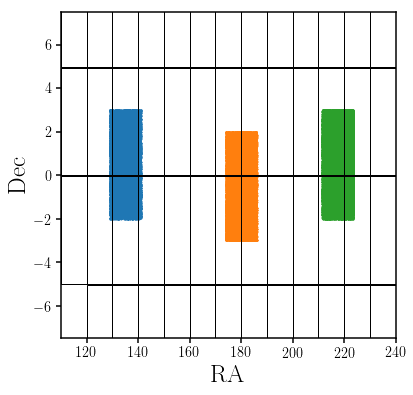

In [12]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for name, field in zip(names, fields): 
    sub.scatter(field['photo']['ra'], field['photo']['dec'], s=1, label=name.upper())
for i in range(len(ra_mins)): 
    sub.add_patch(patches.Rectangle((ra_mins[i], dec_mins[i]), 9.95, 4.95, fill=None, alpha=1))
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([110., 240.])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([-7.5, 7.5])

In [9]:
print ra_mins, ra_maxs
print dec_mins, dec_maxs

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10.  10.  10.  20.  20.  20.  20.
  20.  20.  20.  20.  20.  20.  20.  20.  30.  30.  30.  30.  30.  30.
  30.  30.  30.  30.  30.  30.  40.  40.  40.  40.  40.  40.  40.  40.
  40.  40.  50.  50.  50.  50.  50.  50.  60.  60.  60.  60.  60.  60.
  70.  70.  70.  70.  70.  80.  80.  80. 100. 100. 100. 100. 100. 110.
 110. 110. 110. 110. 110. 110. 110. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 130. 130. 130. 130. 130. 130. 130. 130. 130. 130. 140. 140.
 140. 140. 140. 140. 140. 140. 140. 140. 150. 150. 150. 150. 150. 150.
 150. 150. 150. 150. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 180. 180. 180. 180.
 180. 180. 180. 180. 180. 180. 190. 190. 190. 190. 190. 190. 190. 190.
 190. 190. 190. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 210. 210. 210. 210. 210. 210. 210. 210. 210. 210. 220. 220. 220. 220.
 220. 

In [28]:
ra_mins = 10.*np.arange((field['photo']['ra'].min()//10.), (field['photo']['ra'].max()//10. + 1))
ra_maxs = ra_mins + 10.

In [32]:
dec_mins = 5.*np.arange((field['photo']['dec'].min()//5.), (field['photo']['dec'].max()//5. + 1))
dec_maxs = dec_mins + 5.

In [33]:
print ra_mins, ra_maxs
print dec_mins, dec_maxs

[210. 220.] [220. 230.]
[-5.  0.] [0. 5.]


(-7.5, 7.5)

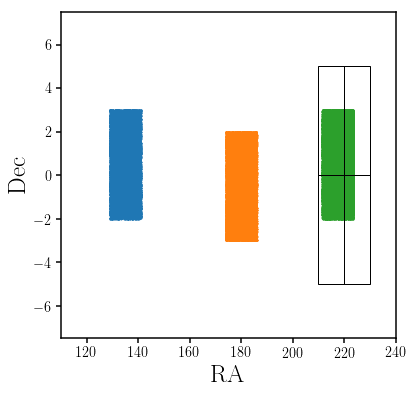

In [34]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for name, field in zip(names, fields): 
    sub.scatter(field['photo']['ra'], field['photo']['dec'], s=1, label=name.upper())
for i in range(len(ra_mins)): 
    for j in range(len(dec_mins)): 
        sub.add_patch(patches.Rectangle((ra_mins[i], dec_mins[j]), ra_maxs[i]-ra_mins[i], dec_maxs[j]-dec_mins[j], 
                                        fill=None, alpha=1))
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([110., 240.])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([-7.5, 7.5])

In [19]:
sweep = mrdfits(UT.dat_dir()+'legacy/sweep/sweep-120m010-130m005.fits')

120.75321510901146 129.9999833518992
-8.866085373097752 -5.000005025375741


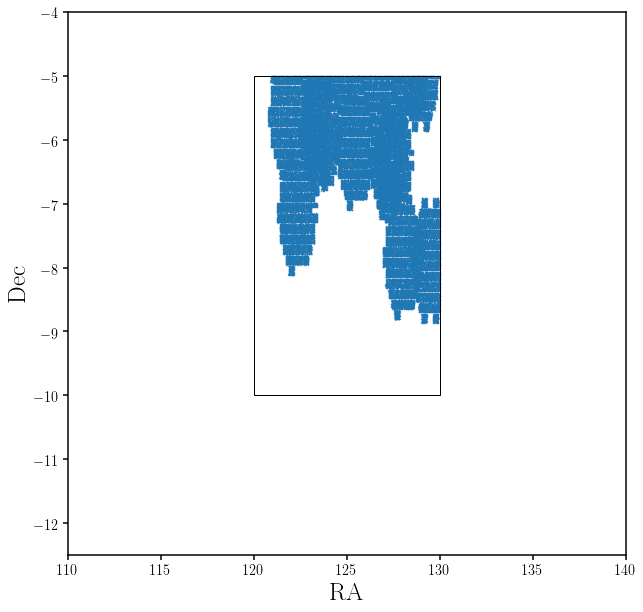

In [27]:
fig = plt.figure(figsize=(10., 10.))
sub = fig.add_subplot(111)
sub.add_patch(patches.Rectangle((120, -10), 10., 5., fill=None, alpha=1))
sub.scatter(sweep.ra[::10], sweep.dec[::10], s=0.1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim([110., 140.])
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim([-12.5, -4.])
print sweep.ra.min(), sweep.ra.max() 
print sweep.dec.min(), sweep.dec.max() 